# This notebook  covers the following topics :
1. Training VGG Net models(VGG16) from Scratch on a Custom Dataset.
2. Training VGG Net(VGG16) of model from Keras(pretrained on ImageNet) using Transfer learning.

In [ ]:
#loading google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Dataset

/content/drive/MyDrive/Colab Notebooks/Dataset


In [ ]:
ls

IntelImageClassificationDataset.zip  seg_pred/  seg_test/  seg_train/


In [ ]:
#!unzip IntelImageClassificationDataset.zip

In [ ]:
ls

IntelImageClassificationDataset.zip  seg_pred/  seg_test/  seg_train/


In [ ]:
cd seg_train

/content/drive/MyDrive/Colab Notebooks/Dataset/seg_train


In [ ]:
cd ..

/content/drive/MyDrive/Colab Notebooks/Dataset


In [ ]:
#writing image data generator
import tensorflow.keras as Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Calculating mean and standard deviation of training and validation dataset.
#source : https://gist.github.com/jdhao/9a86d4b9e4f79c5330d54de991461fd6
"""
in this script, we calculate the image per channel mean and standard
deviation in the training set, do not calculate the statistics on the
whole dataset, as per here http://cs231n.github.io/neural-networks-2/#datapre
"""

'''import numpy as np
from os import listdir
from os.path import join, isdir
from glob import glob
import cv2
import timeit

# number of channels of the dataset image, 3 for color jpg, 1 for grayscale img
# you need to change it to reflect your dataset
CHANNEL_NUM = 3


def cal_dir_stat(root):
    cls_dirs = [d for d in listdir(root) if isdir(join(root, d))]
    pixel_num = 0 # store all pixel number in the dataset
    channel_sum = np.zeros(CHANNEL_NUM)
    channel_sum_squared = np.zeros(CHANNEL_NUM)

    for idx, d in enumerate(cls_dirs):
        print("#{} class".format(idx))
        im_pths = glob(join(root, d, "*.jpg"))

        for path in im_pths:
            im = cv2.imread(path) # image in M*N*CHANNEL_NUM shape, channel in BGR order
            im = im/255.0
            pixel_num += (im.size/CHANNEL_NUM)
            channel_sum += np.sum(im, axis=(0, 1))
            channel_sum_squared += np.sum(np.square(im), axis=(0, 1))

    bgr_mean = channel_sum / pixel_num
    bgr_std = np.sqrt(channel_sum_squared / pixel_num - np.square(bgr_mean))
    
    # change the format from bgr to rgb
    rgb_mean = list(bgr_mean)[::-1]
    rgb_std = list(bgr_std)[::-1]
    
    return rgb_mean, rgb_std

# The script assumes that under train_root, there are separate directories for each class
# of training images.
train_root = "/content/drive/MyDrive/Colab Notebooks/Dataset/seg_train/seg_train/"
val_root = "/content/drive/MyDrive/Colab Notebooks/Dataset/seg_test/seg_test/"
start = timeit.default_timer()
Trainmean, Trainstd = cal_dir_stat(train_root)
Valmean, Valstd = cal_dir_stat(val_root)
end = timeit.default_timer()
print("elapsed time: {}".format(end-start))
print("Train mean:{}\n Train std:{}".format(Trainmean, Trainstd))
print("Val mean:{}\n Val std:{}".format(Valmean, Valstd))'''


'import numpy as np\nfrom os import listdir\nfrom os.path import join, isdir\nfrom glob import glob\nimport cv2\nimport timeit\n\n# number of channels of the dataset image, 3 for color jpg, 1 for grayscale img\n# you need to change it to reflect your dataset\nCHANNEL_NUM = 3\n\n\ndef cal_dir_stat(root):\n    cls_dirs = [d for d in listdir(root) if isdir(join(root, d))]\n    pixel_num = 0 # store all pixel number in the dataset\n    channel_sum = np.zeros(CHANNEL_NUM)\n    channel_sum_squared = np.zeros(CHANNEL_NUM)\n\n    for idx, d in enumerate(cls_dirs):\n        print("#{} class".format(idx))\n        im_pths = glob(join(root, d, "*.jpg"))\n\n        for path in im_pths:\n            im = cv2.imread(path) # image in M*N*CHANNEL_NUM shape, channel in BGR order\n            im = im/255.0\n            pixel_num += (im.size/CHANNEL_NUM)\n            channel_sum += np.sum(im, axis=(0, 1))\n            channel_sum_squared += np.sum(np.square(im), axis=(0, 1))\n\n    bgr_mean = channel_sum

In [ ]:
#creating data generators for train, val and test
import numpy as np
train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,vertical_flip= True, fill_mode='nearest',rotation_range=0.2,featurewise_center=True, featurewise_std_normalization=False)
#Setting mean and standard deviation
train_datagen.mean = np.array([0.43018190132518175, 0.45747632361586804, 0.4538292985249612], dtype=np.float32).reshape((1,1,3)) # ordering: [R, G, B]
train_datagen.std = 0.26
#use featurewise_center' and 'featurewise_std_normalization' to add mean and std. deviation of the dataset
val_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True,  rotation_range=0.2,featurewise_center=True, featurewise_std_normalization=True )
#test data generator is intentionally just normalised.
val_datagen.mean = np.array([0.43315370896247557, 0.45847832080020573, 0.4551063209217124], dtype=np.float32).reshape((1,1,3)) # ordering: [R, G, B]
val_datagen.std = 0.26
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
#generating images on the go
#mentioning train and val directories
TrainDir = '/content/drive/MyDrive/Colab Notebooks/Dataset/seg_train/seg_train/'
ValDir = '/content/drive/MyDrive/Colab Notebooks/Dataset/seg_test/seg_test/'
#Dataset
train_samples = train_datagen.flow_from_directory(TrainDir, target_size=(224,224),class_mode='categorical',batch_size=32, shuffle=True, interpolation='nearest')
val_samples = val_datagen.flow_from_directory(ValDir, target_size=(224,224),class_mode='categorical',batch_size=8, shuffle=True, interpolation='nearest')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
#importing modules for keras model
from tensorflow import keras 
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D, BatchNormalization,Dense,Flatten
from tensorflow.keras.optimizers import SGD,Adam,Adagrad
from tensorflow.keras.models import Sequential

In [ ]:
#function to print output dimension of a max-pool or convolutional neural network given the following Input parameters.
'''
1. Kernel/Filter size (F) 
2. Padding size(p)
3. Input dimension(n)
4. Stride(s)
'''
import math
def Calc_OutDimension(n,f,p,s):
  print(n)
  out_dim = math.floor((n-f+2*p)/s)+1
  return int(out_dim)

Network Architecture : VGG Net Original

In [ ]:
VGGNet = Sequential()
#Note: Optional:: Use padding as 'same' or ZeroPadding2D with padding =1
#2 Convolutions
VGGNet.add(Conv2D(64,kernel_size=(3,3),padding='same',strides=(1,1),kernel_initializer='normal', activation='relu', input_shape = (224,224,3)))
VGGNet.add(BatchNormalization())
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(64,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
#1 Max pool
VGGNet.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#2 convolutions
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(128,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(128,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
# 1 Max pool
VGGNet.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# 3 convolutions
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(256,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(256,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(256,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
# 1 Max pool
VGGNet.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# 3 Convolution
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(512,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(512,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(512,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
#1 Max pool
VGGNet.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# 3 Convolution
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(512,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(512,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
VGGNet.add(ZeroPadding2D(padding=(1,1)))
VGGNet.add(Conv2D(512,kernel_size=(3,3),padding='valid',strides=(1,1),kernel_initializer='normal', activation='relu'))
VGGNet.add(BatchNormalization())
#1 Max pool
VGGNet.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#Flatten
VGGNet.add(Flatten())
#2 Fully connected: 4096 neurons
VGGNet.add(Dense(4096))
VGGNet.add(Dense(4096))
#1 Fully connected: 1000 neurons
VGGNet.add(Dense(1000))
#6 classes
VGGNet.add(Dense(6,  activation='softmax'))



In [ ]:
VGGNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 114, 114, 64)      0

In [ ]:
#compiling the model with optimizer and loss functio
opt  = Adam()
VGGNet.compile(optimizer= opt, loss='categorical_crossentropy', metrics=keras.metrics.CategoricalAccuracy())

#Fit the model with train and val generators
print("Training Started")
history = VGGNet.fit_generator(train_samples, steps_per_epoch=100, epochs=10, verbose=1, callbacks=None, validation_data=val_samples, validation_steps=2, validation_freq=1, class_weight=None, max_queue_size=10, workers=12, use_multiprocessing=True, shuffle=True, initial_epoch=0)

Training Started


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 63s 565ms/step - loss: 108.1999 - categorical_accuracy: 0.2684 - val_loss: 781.4709 - val_categorical_accuracy: 0.3125
Epoch 2/10
100/100 [==============================] - 62s 567ms/step - loss: 5.5784 - categorical_accuracy: 0.3033 - val_loss: 84.3613 - val_categorical_accuracy: 0.3750
Epoch 3/10
100/100 [==============================] - 61s 563ms/step - loss: 2.2910 - categorical_accuracy: 0.3535 - val_loss: 17.2346 - val_categorical_accuracy: 0.0625
Epoch 4/10
100/100 [==============================] - 61s 555ms/step - loss: 1.8201 - categorical_accuracy: 0.4101 - val_loss: 32.6153 - val_categorical_accuracy: 0.1250
Epoch 5/10
100/100 [==============================] - 61s 554ms/step - loss: 1.5285 - categorical_accuracy: 0.4449 - val_loss: 34.8136 - val_categorical_accuracy: 0.3125
Epoch 6/10
100/100 [==============================] - 62s 562ms/step - loss: 1.4442 - categorical_accuracy: 0.4584 - val_loss: 19.4959 - val_catego

In [ ]:
#printing all keys in this loss
print(history.history.keys())


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


In [ ]:
VGGNet.save('VGG16.h5')

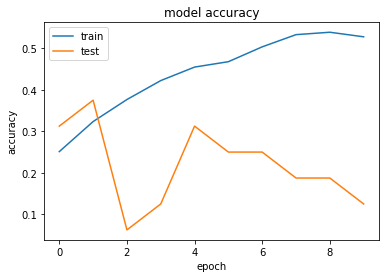

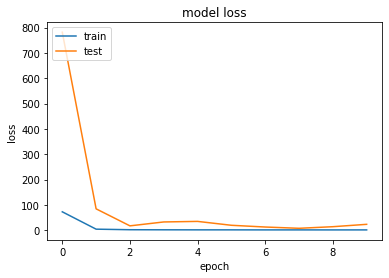

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Convert the model to Tflite

In [ ]:
import tensorflow.compat.v1 as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file("TrainedModels/VGG16.h5")
tflite_model = converter.convert()
open("TrainedModels/VGG16.tflite", "wb").write(tflite_model)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Assets written to: /tmp/tmprzm9y9yg/assets
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from /tmp/tmprzm9y9yg/variables/variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'__saved_model_init_op', 'serving_default'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: conv2d_input
INFO:tensorflow: tensor name: serving_default_conv2d_input:0, shape: (-1, 224, 22

# Training a VGG 16 using Transfer learning.

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.models import Sequential


In [ ]:
TrainDir = '/content/drive/MyDrive/Colab Notebooks/Dataset/seg_train/seg_train/'
ValDir = '/content/drive/MyDrive/Colab Notebooks/Dataset/seg_test/seg_test/'

In [ ]:
#instantiating VGG16 model
VGG_TL =  VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
#Freezing all mid layers
for frozen_layer in VGG_TL.layers:
  frozen_layer.trainable = False

In [ ]:
#find number of classes
import os
ClassLabels= os.listdir(TrainDir)

In [ ]:
#printing the layers inside VGG model
for layer in VGG_TL.layers:
  print(layer)

In [ ]:
#output node
VGG_TL.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
#Flattening the layer
VGG_Features = Flatten()(VGG_TL.output)
print(VGG_Features)

KerasTensor(type_spec=TensorSpec(shape=(None, 25088), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")


In [ ]:
from keras.models import Model
#now creating the softmax node
softmax_node = Dense(len(ClassLabels), activation='softmax')(VGG_Features)
#creating a model object from keras.models
TL_Model = Model(inputs= VGG_TL.input, outputs= softmax_node)

In [ ]:
#printing Model summary
print(TL_Model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#Defining optimizer and compiling
TL_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#configuring image data generator to generate image on the fly
Train_Gen = ImageDataGenerator(rescale=1./255,shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_Gen = ImageDataGenerator(rescale=1./255)
Test_Gen = ImageDataGenerator(rescale=1./255)


In [ ]:
#configuring flow from directory
training_data = Train_Gen.flow_from_directory(TrainDir, target_size=(224,224), class_mode='categorical', batch_size=64)
val_data = val_Gen.flow_from_directory(ValDir, target_size=(224,224), class_mode='categorical', batch_size=64)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
print("Training started")
Logs = TL_Model.fit_generator(training_data,steps_per_epoch=len(training_data), epochs = 10, validation_data=  val_data,validation_steps= len(val_data), max_queue_size=10, workers=10, use_multiprocessing=True)

Training started


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


219/220 [============================>.] - ETA: 0s - loss: 0.3333 - accuracy: 0.8808WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - ETA: 0s - loss: 0.3330 - accuracy: 0.8809WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - 174s 760ms/step - loss: 0.3330 - accuracy: 0.8809 - val_loss: 0.3520 - val_accuracy: 0.8817
Epoch 2/10


219/220 [============================>.] - ETA: 0s - loss: 0.2901 - accuracy: 0.8978WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - ETA: 0s - loss: 0.2896 - accuracy: 0.8980WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - 177s 771ms/step - loss: 0.2896 - accuracy: 0.8980 - val_loss: 0.3647 - val_accuracy: 0.8807
Epoch 3/10


219/220 [============================>.] - ETA: 0s - loss: 0.2690 - accuracy: 0.9028WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - ETA: 0s - loss: 0.2687 - accuracy: 0.9029WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - 178s 772ms/step - loss: 0.2687 - accuracy: 0.9029 - val_loss: 0.3892 - val_accuracy: 0.8717
Epoch 4/10


219/220 [============================>.] - ETA: 0s - loss: 0.2331 - accuracy: 0.9152WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - ETA: 0s - loss: 0.2325 - accuracy: 0.9156WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - 175s 759ms/step - loss: 0.2325 - accuracy: 0.9156 - val_loss: 0.3703 - val_accuracy: 0.8773
Epoch 5/10


219/220 [============================>.] - ETA: 0s - loss: 0.2327 - accuracy: 0.9193WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - ETA: 0s - loss: 0.2329 - accuracy: 0.9193WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - 175s 763ms/step - loss: 0.2329 - accuracy: 0.9193 - val_loss: 0.3852 - val_accuracy: 0.8827
Epoch 6/10


219/220 [============================>.] - ETA: 0s - loss: 0.2183 - accuracy: 0.9236WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - ETA: 0s - loss: 0.2185 - accuracy: 0.9235WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - 174s 757ms/step - loss: 0.2185 - accuracy: 0.9235 - val_loss: 0.4130 - val_accuracy: 0.8640
Epoch 7/10


219/220 [============================>.] - ETA: 0s - loss: 0.1893 - accuracy: 0.9316WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - ETA: 0s - loss: 0.1893 - accuracy: 0.9316WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - 174s 758ms/step - loss: 0.1893 - accuracy: 0.9316 - val_loss: 0.3791 - val_accuracy: 0.8747
Epoch 8/10


219/220 [============================>.] - ETA: 0s - loss: 0.1858 - accuracy: 0.9316WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - ETA: 0s - loss: 0.1859 - accuracy: 0.9315WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - 175s 760ms/step - loss: 0.1859 - accuracy: 0.9315 - val_loss: 0.3741 - val_accuracy: 0.8793
Epoch 9/10


219/220 [============================>.] - ETA: 0s - loss: 0.1919 - accuracy: 0.9295WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - ETA: 0s - loss: 0.1921 - accuracy: 0.9296WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - 175s 760ms/step - loss: 0.1921 - accuracy: 0.9296 - val_loss: 0.3944 - val_accuracy: 0.8777
Epoch 10/10


219/220 [============================>.] - ETA: 0s - loss: 0.1815 - accuracy: 0.9349WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - ETA: 0s - loss: 0.1817 - accuracy: 0.9348WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


220/220 [==============================] - 175s 763ms/step - loss: 0.1817 - accuracy: 0.9348 - val_loss: 0.3695 - val_accuracy: 0.8857


In [ ]:
print(Logs.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


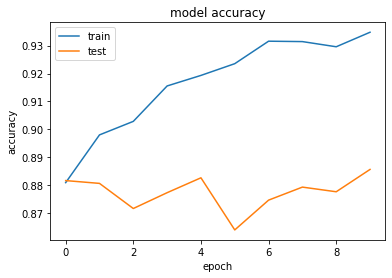

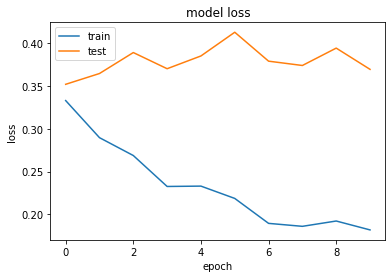

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Logs.history['accuracy'])
plt.plot(Logs.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Logs.history['loss'])
plt.plot(Logs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
TL_Model.save('vgg16_tl.h5')
